<a href="https://colab.research.google.com/github/dantecarlo/Linear-Regression-with-Gradient-Descent/blob/master/Regresi%C3%B3n_Lineal_Gradiente_Descendiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importando librerias neceserias
import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [0]:
#Encontrar hypothesis
def hypothesis(X, Theta):
  h = np.dot(Theta.T, X.T).T
  return h 

In [0]:
# Definir la funcion de Costo
def cost_function(h, y, m):
  J = (1 / (2 * m)) * np.sum(np.square(h-y))
  return J

In [0]:
#  Gradient Descent Univariada
# def gradient_descent_uni(x, y, iterations = 10000, learning_rate = 0.01):
#   grad = np.empty([1,3])
#   m_current = b_current = 0
#   n = len(x)
#   plt.scatter(x, y , marker = '+', alpha = 0.8, color="blue")
#   for _ in range(iterations):
#     y_predicted = func(x, m_current, b_current)
    
#     if( _ % 100 == 0 ):
#       plt.scatter(x, y , marker = '+', alpha = 0.8, color="blue")
#       plt.plot(x, y_predicted, color = 'red')

#     cost = (1/n) * sum([val**2 for val in (y - y_predicted)])

#     md = -(2/n) * np.sum(x * (y - y_predicted))
#     bd = -(2/n) * np.sum((y - y_predicted))

#     m_current = m_current - learning_rate * md
#     b_current = b_current - learning_rate * bd
#     # print ("m {}, b {}, cost {}".format(m_current,b_current,cost))
#     # plt.plot(_, cost, "." ,  color = 'red')
#     grad = np.append(grad, [[m_current, b_current, cost]], axis = 0)
#   # print(grad)
#   return grad

In [0]:
# Gradiente descendente
def gradient_descent(X, y, Theta, m, h, learning_rate):
  Theta = Theta - (learning_rate * (1 / m) * np.sum( np.dot(X.T,(h - y))))
  return Theta

In [0]:
# L.R.model
def lineal_regression_model(X, y, learning_rate, iterations, draw = 0):
  m = y.shape[0]
  # print("m", m)
  
  if len(X.shape) == 1:
     X = np.array([X]).T
  # print(np.ones((X.shape[0],1)))

  # Añadir X0 = 1
  X = np.append(np.ones((X.shape[0],1)), X, axis=1)

  # print(X)
  # inicializando Theta
  # Theta = np.zeros((X.shape[1], 1))
  Theta = np.random.randn(X.shape[1], 1)
  # print(Theta)
  
  costs = []
  history_values = []

  # Iteraciones
  for i in range(0, iterations):
    # print("X", np.shape(X))
    # print("Theta", np.shape(Theta))

    h = hypothesis(X, Theta)
    # print("h", np.shape(h))
    # print(h)
    # print("y", np.shape(y))
    cost = cost_function(h, y, m)
    # print("costo:", cost)
    Theta = gradient_descent(X, y, Theta, m, h, learning_rate)
    # print(Theta)
    RMSE = np.sqrt((1 / m) * np.sum(np.square(h - y)))
    history_values.append([Theta, RMSE])
    costs.append(cost)


  if draw :
    x = range(0, iterations)
    plt.plot(x ,costs)
    plt.xlabel("Iterations(per tens)")
    plt.ylabel("Training cost")
    plt.title("Learning rate" + str(learning_rate))
    plt.grid()
    plt.show()
  history_values = np.array(history_values)
  return history_values, costs_train

In [0]:
# Importando data
price = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/ex1data2(Home_1f).csv", sep='\t')
ocean = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/oceano_simple.csv", sep='\t')
petrol = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Regresion Lineal con Gradiente Descendiente/petrol_consumption.csv", sep='\t')

In [0]:
# Transformando a np.array
price_X = np.array(price["Size_(m2)"])
price_Y = np.array(price["Price"])

ocean_X = np.array(ocean["Sal"])
ocean_Y = np.array(ocean["Temp"])

petrol_X = np.array(petrol[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]])
petrol_Y = np.array(petrol["Petrol_Consumption"])

In [0]:
# Funcion de regularizacion
def regularization(matrx):
  matrx = (matrx - np.mean(matrx)) / (np.std(matrx))
  # matrx = (matrx - np.mean(matrx)) / (np.max(matrx) - np.min(matrx))
  return matrx

In [0]:
# Normalizar valores
price_X = regularization(price_X)
price_Y = regularization(price_Y)

ocean_X = regularization(ocean_X)
ocean_Y = regularization(ocean_Y)

petrol_X = regularization(petrol_X)
petrol_Y = regularization(petrol_Y)

print(np.mean(ocean_X))
print(np.std(ocean_X))

-3.89072489925318e-15
0.9999999999999999


In [0]:
# Dividiendo training set && validation set
from sklearn.model_selection import train_test_split

price_X_train, price_X_val, price_Y_train, price_Y_val = train_test_split(price_X, price_Y, test_size = 0.33, random_state = 5)
ocean_X_train, ocean_X_val, ocean_Y_train, ocean_Y_val = train_test_split(ocean_X, ocean_Y, test_size = 0.33, random_state = 5)
petrol_X_train, petrol_X_val, petrol_Y_train, petrol_Y_val = train_test_split(petrol_X, petrol_Y, test_size = 0.33, random_state = 5)

In [0]:
# Rectificando datos
price_X_train = price_X_train
price_Y_train = np.array([price_Y_train]).T

price_X_val = price_X_val
price_Y_val = np.array([price_Y_val]).T

ocean_X_train = ocean_X_train
ocean_Y_train = np.array([ocean_Y_train]).T

ocean_X_val = ocean_X_val
ocean_Y_val = np.array([ocean_Y_val]).T

petrol_X_train = petrol_X_train
petrol_Y_train = np.array([petrol_Y_train]).T

petrol_X_val = petrol_X_val
petrol_Y_val = np.array([petrol_Y_val]).T

Precio Viviendas


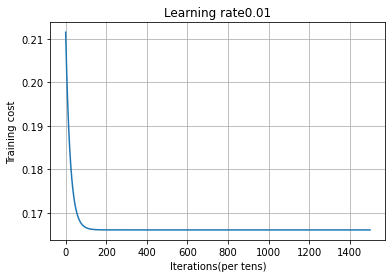

Temperatura Oceánica


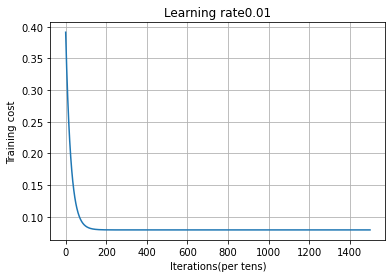

Consumo de Petroleo


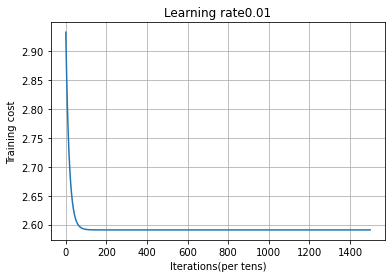

In [589]:
# Llamando a la regresion lineal
learning_rate = 0.01
iterations = 1500
print("Precio Viviendas")
history_price, costs_train = lineal_regression_model(price_X_train, price_Y_train, learning_rate, iterations, 1)
print("Temperatura Oceánica")
history_ocean, costs_train = lineal_regression_model(ocean_X_train, ocean_Y_train, learning_rate, iterations, 1)
print("Consumo de Petroleo")
history_petrol, costs_train = lineal_regression_model(petrol_X_train, petrol_Y_train, learning_rate, iterations, 1)

m: 1.0594297595115307| b: -0.3103251372371377


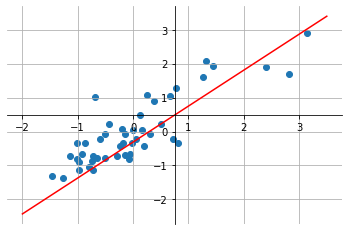

In [590]:
# Grafica Datos price
# print(history_price)
m_price = history_price[-1][0].item(1)
b_price = history_price[-1][0].item(0)

print("m: " + str(m_price) + "| b: " + str(b_price))
m_history_price = history_price[:,0]
b_history_price = history_price[:,1]

fig_price = plt.figure()
ax_price = fig_price.add_subplot(1, 1, 1)
x_price = np.linspace(-5,5,100).T
ax_price.spines['left'].set_position('center')
ax_price.spines['bottom'].set_position('center')
ax_price.spines['right'].set_color('none')
ax_price.spines['top'].set_color('none')
ax_price.xaxis.set_ticks_position('bottom')
ax_price.yaxis.set_ticks_position('left')
plt.scatter(price_X, price_Y)
x_price = np.arange(-2, 4, 0.5)
y_price = m_price * x_price + b_price
plt.plot(x_price, y_price, '-r')
plt.grid()
plt.show()

m:[0.84158228]
b:[-0.02512726]


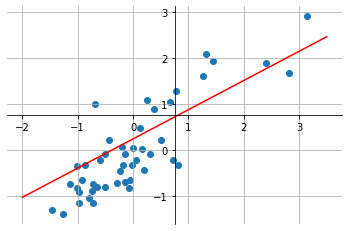

In [591]:
# Ecuacion Normal price
X_1_price = np.array([np.ones(np.shape(price_X_train)[0]), price_X_train]).T
B_price = np.linalg.inv(X_1_price.T @ X_1_price) @ X_1_price.T @ price_Y_train
m_price = B[1]
b_price = B[0]
print("m:" +  str(B_price[1]))
print("b:" +  str(B_price[0]))

fig = plt.figure()
ax_price = fig.add_subplot(1, 1, 1)
x_price = np.linspace(-5,5,100)
ax_price.spines['left'].set_position('center')
ax_price.spines['bottom'].set_position('center')
ax_price.spines['right'].set_color('none')
ax_price.spines['top'].set_color('none')
ax_price.xaxis.set_ticks_position('bottom')
ax_price.yaxis.set_ticks_position('left')
plt.scatter(price_X, price_Y)
x_price = np.arange(-2, 4, 0.5)
y_price = m * x + b
plt.plot(x_price, y_price, '-r')
plt.grid()
plt.show()

m: 0.6326911373966844| b: 0.24834531394827475


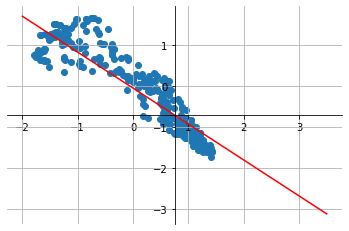

In [592]:
# Grafica Datos ocean
m_ocean = history_ocean[-1][0].item(1)
b_ocean = history_ocean[-1][0].item(0)

print("m: " + str(m) + "| b: " + str(b))
m_history_ocean = history_ocean[:,0]
b_history_ocean = history_ocean[:,1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5,5,100).T
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.scatter(ocean_X_train, ocean_Y_train)
x_ocean = np.arange(-2, 4, 0.5)
y_ocean = m_ocean * x_ocean + b_ocean
plt.plot(x_ocean, y_ocean, '-r')
plt.grid()
plt.show()

m:[-0.91312856]
b:[-0.00860397]


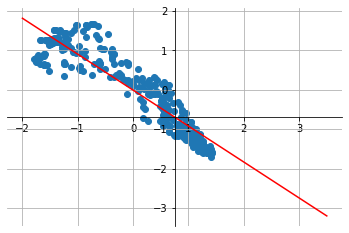

In [593]:
# Ecuacion Normal ocean
X_1_ocean = np.array([np.ones(np.shape(ocean_X_train)[0]), ocean_X_train]).T
B_ocean = np.linalg.inv(X_1_ocean.T @ X_1_ocean) @ X_1_ocean.T @ ocean_Y_train
m_ocean = B_ocean[1]
b_ocean = B_ocean[0]
print("m:" +  str(m_ocean))
print("b:" +  str(b_ocean))

fig_ocean = plt.figure()
ax_ocean = fig_ocean.add_subplot(1, 1, 1)
x_ocean = np.linspace(-5,5,100)
ax_ocean.spines['left'].set_position('center')
ax_ocean.spines['bottom'].set_position('center')
ax_ocean.spines['right'].set_color('none')
ax_ocean.spines['top'].set_color('none')
ax_ocean.xaxis.set_ticks_position('bottom')
ax_ocean.yaxis.set_ticks_position('left')
plt.scatter(ocean_X_train, ocean_Y_train)
x_ocean = np.arange(-2, 4, 0.5)
y_ocean = m_ocean * x_ocean + b_ocean
plt.plot(x_ocean, y_ocean, '-r')
plt.grid()
plt.show()

In [584]:
# Ecuacion Normal petrol
# X_1_petrol = np.array([np.ones(np.shape(petrol_X_train)[0]), petrol_X_train]).T
X_1_petrol = np.append(np.ones((petrol_X_train.shape[0],1)), petrol_X_train, axis=1)
B_petrol = np.linalg.inv(X_1_petrol.T @ X_1_petrol) @ X_1_petrol.T @ petrol_Y_train
print(B_petrol)

[[ 3.05075672e+04]
 [-1.13338355e+03]
 [-1.81049051e+00]
 [-1.45128728e-01]
 [ 3.90205259e+04]]


In [594]:
# Tabla RMSE
print(" ----------------------------------------------------------------------------")
print("|          | Precio Viviendas   | Temperatura Oceanica | Consumo de Petróleo |")
print(" ----------------------------------------------------------------------------")
print("|   RMSE   | " + str(history_price[-1][1]) + " | " + str(history_ocean[-1][1]) + "   | " + str(history_petrol[-1][1]) + "  |")
print(" ----------------------------------------------------------------------------")


 ----------------------------------------------------------------------------
|          | Precio Viviendas   | Temperatura Oceanica | Consumo de Petróleo |
 ----------------------------------------------------------------------------
|   RMSE   | 0.5762499223164163 | 0.3981815768591733   | 2.276361832912489  |
 ----------------------------------------------------------------------------


In [603]:
# Hiperparametros Optimos
learning_rate_v = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations_v = [*range(500, 3500, 500)]
history_price = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history, cost = lineal_regression_model(price_X_train, price_Y_train, learning_rate, iterations)
    history_price.append([learning_rate, iterations, history[-1][1]])

print(history_price)

history_ocean = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history, cost = lineal_regression_model(ocean_X_train, ocean_Y_train, learning_rate, iterations)
    history_ocean.append([learning_rate, iterations, history[-1][1]])

print(history_ocean)

history_petrol = []

for learning_rate in learning_rate_v:
  for iterations in iterations_v:
    history, cost = lineal_regression_model(petrol_X_train, petrol_Y_train, learning_rate, iterations)
    history_petrol.append([learning_rate, iterations, history[-1][1]])

print(history_petrol)


[[0.01, 500, 1.3390224341885457], [0.01, 1000, 0.4932639118319459], [0.01, 1500, 1.4652951215491332], [0.01, 2000, 0.7680107752172385], [0.01, 2500, 1.1314932541024616], [0.01, 3000, 1.1754742972554582], [0.05, 500, 0.8759091676159267], [0.05, 1000, 3.6881309003414557], [0.05, 1500, 0.46294457022570934], [0.05, 2000, 0.8778417698973535], [0.05, 2500, 1.5112190461262636], [0.05, 3000, 2.1013569972625294], [0.1, 500, 0.799868551082764], [0.1, 1000, 1.0039197461834402], [0.1, 1500, 0.9791475715250998], [0.1, 2000, 0.7564021711798605], [0.1, 2500, 0.6614091683293721], [0.1, 3000, 0.44252227623297885], [0.2, 500, 0.5061006617089138], [0.2, 1000, 1.3093110433105852], [0.2, 1500, 0.5038838523598467], [0.2, 2000, 0.907239971734338], [0.2, 2500, 0.4531513920311717], [0.2, 3000, 2.1432713732308084], [0.3, 500, 0.7934884185364467], [0.3, 1000, 1.9353830322510106], [0.3, 1500, 0.5927899049157763], [0.3, 2000, 1.0250317147578085], [0.3, 2500, 1.9017155130523444], [0.3, 3000, 1.5718908484937408], [0

In [615]:
print("Precio Viviendas")
print(" ---------------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE                |")
print(" ---------------------------------------------------------")
for his in history_price:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "  |")
print(" ---------------------------------------------------------")

print("Temperatura Oceanica")
print(" ---------------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE                |")
print(" ---------------------------------------------------------")
for his in history_ocean:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "  |")
print(" ---------------------------------------------------------")

print("Consumo de Petróleo")
print(" ---------------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | RMSE                |")
print(" ---------------------------------------------------------")
for his in history_petrol:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "  |")
print(" ---------------------------------------------------------")

Precio Viviendas
 ---------------------------------------------------------
| Tasa de Aprendizaje | Iteraciones | RMSE                |
 ---------------------------------------------------------
|        0.01         |     500     | 1.3390224341885457  |
|        0.01         |     1000     | 0.4932639118319459  |
|        0.01         |     1500     | 1.4652951215491332  |
|        0.01         |     2000     | 0.7680107752172385  |
|        0.01         |     2500     | 1.1314932541024616  |
|        0.01         |     3000     | 1.1754742972554582  |
|        0.05         |     500     | 0.8759091676159267  |
|        0.05         |     1000     | 3.6881309003414557  |
|        0.05         |     1500     | 0.46294457022570934  |
|        0.05         |     2000     | 0.8778417698973535  |
|        0.05         |     2500     | 1.5112190461262636  |
|        0.05         |     3000     | 2.1013569972625294  |
|        0.1         |     500     | 0.799868551082764  |
|        0.1    